(100, 3)
(3,)
(1, 3)
epoch : 0/1000  err = 0.271894
epoch : 1/1000  err = 0.158682
epoch : 2/1000  err = 0.132042
epoch : 3/1000  err = 0.127073
epoch : 4/1000  err = 0.124820
epoch : 5/1000  err = 0.123388
epoch : 6/1000  err = 0.121595
epoch : 7/1000  err = 0.118474
epoch : 8/1000  err = 0.114880
epoch : 9/1000  err = 0.111203
epoch : 10/1000  err = 0.106676
epoch : 11/1000  err = 0.101811
epoch : 12/1000  err = 0.096409
epoch : 13/1000  err = 0.090829
epoch : 14/1000  err = 0.085367
epoch : 15/1000  err = 0.080347
epoch : 16/1000  err = 0.076039
epoch : 17/1000  err = 0.072740
epoch : 18/1000  err = 0.070229
epoch : 19/1000  err = 0.068389
epoch : 20/1000  err = 0.067049
epoch : 21/1000  err = 0.066049
epoch : 22/1000  err = 0.065445
epoch : 23/1000  err = 0.064679
epoch : 24/1000  err = 0.064216
epoch : 25/1000  err = 0.063845
epoch : 26/1000  err = 0.063709
epoch : 27/1000  err = 0.063266
epoch : 28/1000  err = 0.063074
epoch : 29/1000  err = 0.062912
epoch : 30/1000  err = 0.0627

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_30708\2639333861.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('epoch : %d/%d  err = %f'%(i, epochs, err))


epoch : 109/1000  err = 0.061143
epoch : 110/1000  err = 0.061133
epoch : 111/1000  err = 0.061123
epoch : 112/1000  err = 0.061113
epoch : 113/1000  err = 0.061102
epoch : 114/1000  err = 0.061092
epoch : 115/1000  err = 0.061082
epoch : 116/1000  err = 0.061341
epoch : 117/1000  err = 0.061324
epoch : 118/1000  err = 0.061312
epoch : 119/1000  err = 0.061034
epoch : 120/1000  err = 0.061089
epoch : 121/1000  err = 0.061046
epoch : 122/1000  err = 0.061025
epoch : 123/1000  err = 0.061010
epoch : 124/1000  err = 0.061278
epoch : 125/1000  err = 0.060993
epoch : 126/1000  err = 0.061036
epoch : 127/1000  err = 0.060991
epoch : 128/1000  err = 0.061259
epoch : 129/1000  err = 0.060961
epoch : 130/1000  err = 0.061004
epoch : 131/1000  err = 0.060955
epoch : 132/1000  err = 0.061226
epoch : 133/1000  err = 0.060937
epoch : 134/1000  err = 0.060968
epoch : 135/1000  err = 0.060919
epoch : 136/1000  err = 0.060921
epoch : 137/1000  err = 0.060948
epoch : 138/1000  err = 0.060894
epoch : 13

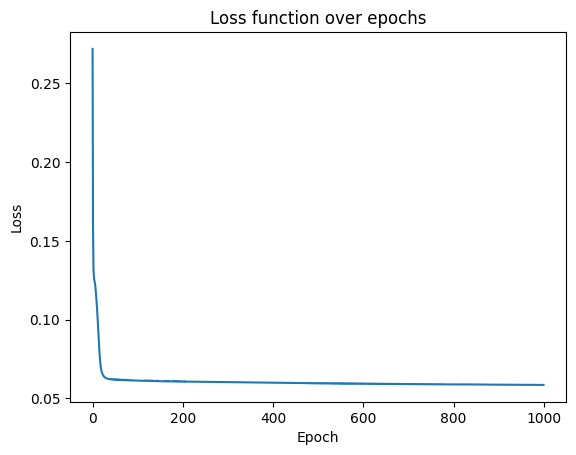

In [7]:

# 1. CLASS LAYER

from abc import abstractmethod 
from sklearn.model_selection import train_test_split
import pandas as pd 
 
class Layer: 
    def __init__(self): 
        self.input = None 
        self.output = None 
        self.input_shape = None 
        self.output_shape = None 
        raise NotImplementedError 
 
    @abstractmethod 
    def input(self): 
        return self.input 
 
    @abstractmethod 
    def output(self): 
        return self.output 
 
    @abstractmethod 
    def input_shape(self): 
        return self.input_shape 
 
    @abstractmethod 
    def output_shape(self): 
        return self.output_shape 
 
    @abstractmethod 
    def forward_propagation(self, input): 
        raise NotImplementedError 
 
    @abstractmethod 
    def backward_propagation(self, output_error, learning_rate): 
        raise NotImplementedError 

# 2. FULL CONNECTED LAYER
# from .layer import Layer 
import numpy as np 
 
class FCLayer(Layer): 
    def __init__(self, input_shape, output_shape): 
        """ 
 
        :param input_shape:  (1, 3) 
        :param output_shape: (1, 4) 
        (1X3) (3x4) => (1, 4) 
        (3, 1) (1, 4) => (3x4) 
        """ 
        self.input_shape = input_shape 
        self.output_shape = output_shape 
        self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5 
        self.bias = np.random.rand(1, output_shape[1]) - 0.5 
 
    def forward_propagation(self, input): 
        self.input = input 
        self.output = np.dot(self.input, self.weights) + self.bias 
        return  self.output 
 
    def backward_propagation(self, output_error, learning_rate): 
        curent_layer_err =  np.dot(output_error, self.weights.T) 
        dweight = np.dot(self.input.T, output_error) 
 
        self.weights -= dweight*learning_rate 
        self.bias -= learning_rate*output_error 
 
        return curent_layer_err 
    
# 3. CLASS ACTIVATION LAYER
# from .layer import Layer 
 
class ActivationLayer(Layer): 
    def __init__(self, input_shape, output_shape, activation, activation_prime): 
        """ 
        :param input_shape:  đầu vào input mảng (1, 4) 
        :param output_shape:  mảng 
        :param activation:  hàm 
        :param activation_prime:  hàm 
        """ 
        self.input_shape = input_shape 
        self.output_shape = output_shape 
        self.activation = activation 
        self.activation_prime = activation_prime 
 
    def forward_propagation(self, input): 
        self.input = input 
        self.output = self.activation(input) 
        return self.output 
 
    def backward_propagation(self, output_error, learning_rate): 
        return self.activation_prime(self.input)*output_error 
    
# 4. CLASS NEURAL NETWORK LAYER
class Network: 
    def __init__(self): 
        self.layers = [] 
        self.loss = None 
        self.loss_prime = None 
 
    def add(self, layer): 
        self.layers.append(layer) 
 
    def setup_loss(self, loss, loss_prime): 
        self.loss = loss 
        self.loss_prime = loss_prime 
 
    def predict(self, input): 
        """ 
 
        :param input: [[1, 3]] = > 1 , [[1, 3], [3, 5], [3, 4]] 
        :return: kết quả dự đoán 
        """ 
        result = [] 
        n = len(input) 
        for i in range(n): 
            output = input[i] 
 
            for layer in self.layers: 
                output = layer.forward_propagation(output) 
            result.append(output) 
 
        return result 
 
    def fit(self, x_train, y_train, losses_train = any, learning_rate = any, epochs = any): 
 
        n = len(x_train) 
        for i in range(epochs): 
            err = 0 
            for j in range(n): 
                #lan truyen tiến 
                output = x_train[j] 
                for layer in self.layers: 
                    output = layer.forward_propagation(output) 
 
                #tính lỗi của từng 
                err += self.loss(y_train[j], output) 
 
                #lan truyền ngược 
                error = self.loss_prime(y_train[j], output) 
                for layer in reversed(self.layers): 
                    error = layer.backward_propagation(error, learning_rate) 
 
            err = err / n 
            losses_train.append(err[0][0]) # Thêm vào mảng losses_train
            print('epoch : %d/%d  err = %f'%(i, epochs, err)) 

# 5. CẤU HÌNH DỰ ĐOÁN DỰA TRÊN NEURAL NETWORK
#from network.network import Network 
#from layers.FCLayer import FCLayer 
#from layers.activation_layer import ActivationLayer 
import numpy as np 
 
def relu(z): 
    """ 
 
    :param z:  numpy array 
    :return: 0 nếu z <= 0 
         z nếu z > 0 
         [1, -3, 9, -7] => [1, 0, 9, 0] 
    """ 
    return np.maximum(0, z) 
 
def relu_prime(z): 
    """ 
 
    :param z: numpy array 
    :return: array 1, 0 z> 0 => 1, z < 0 => 0 
    """ 
    z[z<0]=0 
    z[z>0]=1 
    return z 
 
def loss(y_true, y_pred): 
    return 0.5*(y_pred-y_true)**2 

def loss_prime(y_true, y_pred): 
    return y_pred-y_true 

df = pd.read_csv('data_logistic.csv')
data = df.to_numpy()
X = data[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng là output
y = data[:, -1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# x_train = X_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]]) 
# y_train = X_test = np.array([[[0]], [[1]], [[1]], [[0]]]) 

x_train = np.reshape(X_train, (X_train.shape[0], 1, 2))
y_train = np.reshape(y_train, (y_train.shape[0], 1, 1))

X_test = np.reshape(X_test, (X_test.shape[0], 1, 2))
y_test = np.reshape(y_test, (y_test.shape[0], 1, 1))

net = Network() 
net.add(FCLayer((1, 2), (1, 3))) 
net.add(ActivationLayer((1, 3), (1, 3), relu, relu_prime)) 
net.add(FCLayer((1, 3), (1, 1))) 
net.add(ActivationLayer((1, 1), (1, 1), relu, relu_prime)) 
net.setup_loss(loss, loss_prime) 

# Huấn luyện mô hình 
losses_train = []
net.fit(x_train, y_train, losses_train, epochs=1000, learning_rate=0.01) 

# Dự đoán đầu ra
predictions = net.predict(X_test)
# Chuyển đổi các giá trị dự đoán thành các nhãn nhị phân (0 hoặc 1)
predictions_binary = (predictions[0] > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y_test)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.show()